In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import os
from sklearn.preprocessing import MinMaxScaler
import scraper
import ta
from PIL import Image
from pyts.multivariate.image import JointRecurrencePlot
from pyts.image import RecurrencePlot
import numpy as np
import datetime

In [4]:
def fetch_csv(directory='/home/jupyter/',ticker='AMZN'):
    try:
        data = pd.read_csv(directory+'data-'+ticker+'.csv',sep='\t') 
    except Exception:
        print('Reading csv for ticker %s failed' %ticker)
        try:
            scraper.somethingScraper(directory=directory, ticker=ticker)
        except Exception:
            print('Scrapping failed for ticker %s ' %ticker)
            data = pd.dataframe()
        else:
            data = pd.read_csv(directory+'data-'+ticker+'.csv',sep='\t')
    else:
        print('Read csv for ticker %s successful' %ticker)
    
    return data

In [6]:
def set_up_down(df):
    df = df.copy()
    df['Up'] = df['Close'] > df['Open']
    df['NextDayUp'] = df.Up.shift(periods=-1)
    return df

In [5]:
data = fetch_csv()

Read csv for ticker AMZN successful


In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [12]:
df = data.drop(['Adj Close'],axis=1,inplace=False)
df['Date']= pd.to_datetime(df['Date'])
df['Date']=df['Date'].apply(lambda x: int(x.strftime("%Y%m%d")))
#df.set_index('Date',inplace=True)

In [21]:
df = df.head(10)

In [22]:
n1 = df[['Date','Open']].to_numpy()
n2 = df[['Date','Close']].to_numpy()

In [23]:
n1

array([[1.9970515e+07, 2.4375000e+00],
       [1.9970516e+07, 1.9687500e+00],
       [1.9970519e+07, 1.7604170e+00],
       [1.9970520e+07, 1.7291670e+00],
       [1.9970521e+07, 1.6354170e+00],
       [1.9970522e+07, 1.4375000e+00],
       [1.9970523e+07, 1.4062500e+00],
       [1.9970527e+07, 1.5104170e+00],
       [1.9970528e+07, 1.6250000e+00],
       [1.9970529e+07, 1.5416670e+00]])

In [24]:
t = np.stack((n1,n2))
t.shape

(2, 10, 2)

In [25]:
t

array([[[1.9970515e+07, 2.4375000e+00],
        [1.9970516e+07, 1.9687500e+00],
        [1.9970519e+07, 1.7604170e+00],
        [1.9970520e+07, 1.7291670e+00],
        [1.9970521e+07, 1.6354170e+00],
        [1.9970522e+07, 1.4375000e+00],
        [1.9970523e+07, 1.4062500e+00],
        [1.9970527e+07, 1.5104170e+00],
        [1.9970528e+07, 1.6250000e+00],
        [1.9970529e+07, 1.5416670e+00]],

       [[1.9970515e+07, 1.9583330e+00],
        [1.9970516e+07, 1.7291670e+00],
        [1.9970519e+07, 1.7083330e+00],
        [1.9970520e+07, 1.6354170e+00],
        [1.9970521e+07, 1.4270830e+00],
        [1.9970522e+07, 1.3958330e+00],
        [1.9970523e+07, 1.5000000e+00],
        [1.9970527e+07, 1.5833330e+00],
        [1.9970528e+07, 1.5312500e+00],
        [1.9970529e+07, 1.5052080e+00]]])

In [26]:
transformer = JointRecurrencePlot()
X_new = transformer.transform(t)

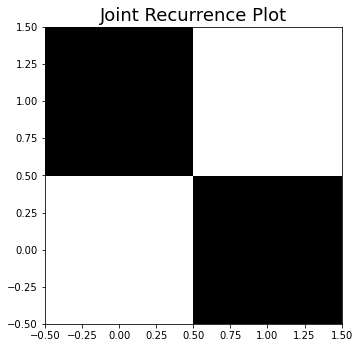

In [27]:
plt.figure(figsize=(5, 5))
plt.imshow(X_new[0], cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()